In [1]:
# Importo Librerias 
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import rescale_intensity

# Funciones Necesarias


In [2]:
def anadir_ruido_salt_pepper(imagen, probabilidad_ruido=0.005):
    """
    Añade ruido de tipo 'salt and pepper' a la imagen proporcionada.

    Parámetros:
    - imagen: Array de NumPy que representa la imagen en escala de grises.
    - probabilidad_ruido: Probabilidad de que un píxel sea alterado (valor entre 0 y 1).

    Retorna:
    - imagen: La imagen con el ruido añadido.
    """
    # Generar una máscara de ruido aleatorio
    ruido = np.random.rand(*imagen.shape)
    
    # Aplicar "sal" (píxeles blancos en el rango [0, 1])
    imagen[ruido < (probabilidad_ruido / 2)] = 1.0
    
    # Aplicar "pimienta" (píxeles negros en el rango [0, 1])
    imagen[ruido > (1 - probabilidad_ruido / 2)] = 0.0
    
    return imagen

def convolution(image, kernel):
    """
    Realiza la convolución de una imagen con un kernel.
    """
    (iH, iW) = image.shape[:2]  # obtiene las dimensiones de la imagen de entrada
    (kH, kW) = kernel.shape[:2]  # obtiene las dimensiones del kernel

    pad = (kH - 1) // 2

    # Crear un borde de relleno alrededor de la imagen
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='edge')

    output = np.zeros((iH, iW), dtype="float")
    for y in range(pad, iH + pad):
        for x in range(pad, iW + pad):
            roi = padded_image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            k = np.sum(roi * kernel)
            output[y - pad, x - pad] = k

    # Normalizar la imagen de salida
    output = rescale_intensity(output, in_range='image', out_range=(0, 255))
    output = output.astype("uint8")
    return output


# Carga de Imagen

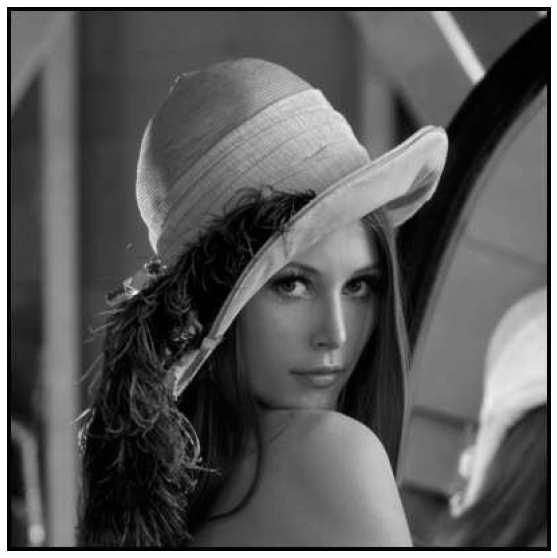

In [3]:
# Leer la imagen desde el archivo
imagen = plt.imread(r'C:\Users\Daniel Calderon\Desktop\2024-2 Poli\Vision Con IA\Practica1\Reto Convoluciones\lena.jpg')

# Asegurarse de que la imagen esté en formato flotante y en el rango [0, 1]
if imagen.dtype == np.uint8:
    imagen = imagen.astype(float) / 255.0

# Verificar si la imagen tiene tres canales (RGB)
if len(imagen.shape) == 3 and imagen.shape[2] == 3:
    # Convertir a escala de grises usando la fórmula ponderada
    imagen_gris = np.dot(imagen[..., :3], [0.2989, 0.5870, 0.1140])
else:
    # Si la imagen ya está en escala de grises, no hacer nada
    imagen_gris = imagen

plt.figure(figsize=(10, 10))
plt.imshow(imagen_gris, cmap='gray')
plt.axis('off')
plt.show()

# Añadir ruido "salt and pepper" a la imagen en escala de grises

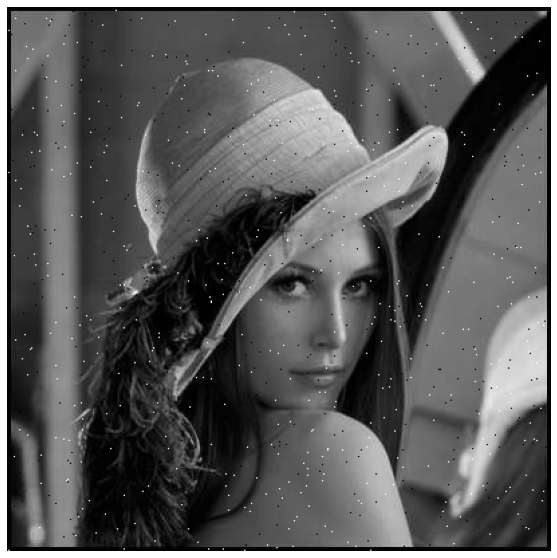

In [4]:
imagen_nueva = anadir_ruido_salt_pepper(imagen_gris.copy())
plt.figure(figsize=(10, 10))
plt.imshow(imagen_nueva, cmap='gray')
plt.axis('off')
plt.show()

# Definir el kernel de convolución media

In [5]:

kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])

# Aplicar la convolución


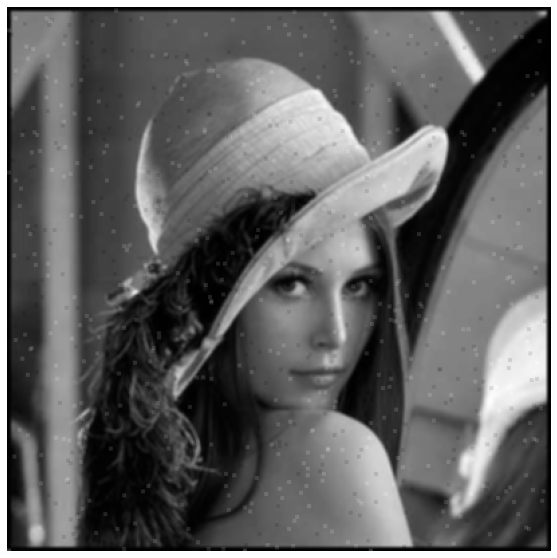

In [6]:
imagen_con_filtro = convolution(imagen_nueva, kernel)

plt.figure(figsize=(10, 10))
plt.imshow(imagen_con_filtro, cmap='gray')
plt.axis('off')
plt.show()

# Respuesta Final

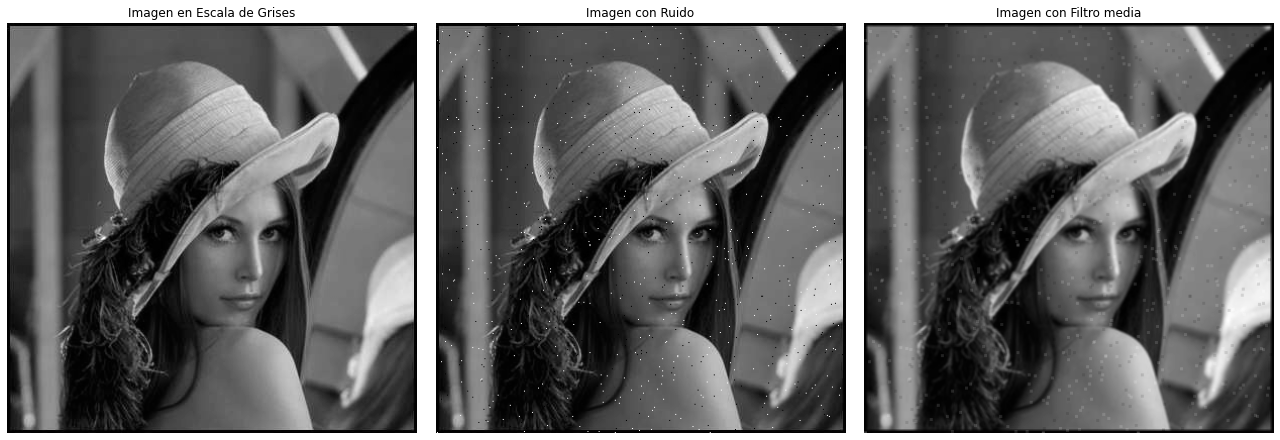

In [7]:
# Mostrar todas las imágenes en una ventana horizontal
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(imagen_gris, cmap='gray')
axs[0].set_title('Imagen en Escala de Grises')
axs[0].axis('off')

axs[1].imshow(imagen_nueva, cmap='gray')
axs[1].set_title('Imagen con Ruido')
axs[1].axis('off')

axs[2].imshow(imagen_con_filtro, cmap='gray')
axs[2].set_title('Imagen con Filtro media')
axs[2].axis('off')

plt.tight_layout()
plt.show()

# Resumen

# El ruido tipo sal y pimienta en imágenes se puede mitigar utilizando filtros de media. Estos filtros ayudan a reducir el ruido al reemplazar cada píxel por el valor promedio de sus vecinos, lo que es eficaz para eliminar el ruido.

# Aunque el filtro de media es efectivo para reducir el ruido, puede causar una pérdida de detalles y nitidez en la imagen. Por lo tanto, es ideal para situaciones donde la reducción del ruido es más crítica que mantener la claridad de la imagen.

# Para imágenes donde la nitidez es menos importante y el ruido tipo sal y pimienta es prominente, el filtro de media puede ser una solución adecuada, proporcionando una mejora notable en la calidad visual.
